**BFS Algorithm:**

1. Starting point: Pick a starting node.
2. Queueing nodes: Enqueue the starting node and mark it as visited.
3. Exploring nodes: Dequeue a node, examine its unvisited neighbors, and enqueue them.
4. Expand: Repeat until all reachable nodes are explored.


In [ ]:
from collections import deque

def bfs(graph, start_node, goal_node):
    """
    BFS with goal check.
    """
    visited = set([start_node])
    queue = deque([start_node])
    parent = {start_node: None}  # for path reconstruction

    while queue:
        current_node = queue.popleft()
        print(f"Visiting node: {current_node}")

        # Goal test
        if current_node == goal_node:
            print("Goal found!")
            # reconstruct path from start to goal
            path = []
            while current_node is not None:
                path.append(current_node)
                current_node = parent[current_node]
            return list(reversed(path))

        else:
            for neighbor in graph[current_node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    parent[neighbor] = current_node
                    queue.append(neighbor)

    return None  # goal not found

In [2]:
start_node = 'D'
parent = {start_node: None} 

In [4]:
print(parent['D'])

None


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}
#print(graph)

In [7]:
graph['E']

{'B', 'F'}

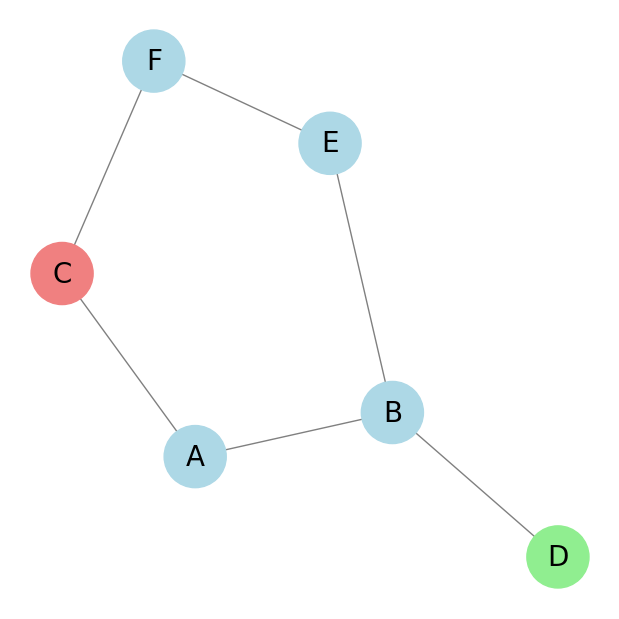

In [15]:
start_node = 'D'
goal_node = 'C'

G = nx.Graph(graph)

# Assign colors
colors = []
for node in G.nodes():
    if node == start_node:
        colors.append("lightgreen")   # start node
    elif node == goal_node:
        colors.append("lightcoral")   # goal node
    else:
        colors.append("lightblue")    # all others

# Draw
plt.figure(figsize=(6, 6))
nx.draw(
    G,
    pos=nx.spring_layout(G, seed=42),  # layout
    with_labels=True,
    font_size=20,
    node_size=2000,
    node_color=colors,
    edge_color="gray"
)
plt.show()

---

In [16]:
path = bfs(graph, start_node, goal_node)
print("Path:", path)

Visiting node: D
Visiting node: B
Visiting node: E
Visiting node: A
Visiting node: F
Visiting node: C
Goal found!
Path: ['D', 'B', 'A', 'C']
